# Algoritmo XGBoost 

XGBoost es la abreviacion de $\textbf{eXtreme Gradient Boosting }$, es una implementacion eficiente de codigo abierto del $\textbf{Algoritmo de Gradiente de Arboles Reforzados }$, es un algoritmo de aprendizaje supervisado, el cual intenta predecir una variable objetivo realizando combinaciones de un conjunto de modelos mas simples. 

El modelo $\textbf{eXtreme Gradient Boosting (XGBoost) }$ fue desarrollado principalmente por el profesor Tianqi Chen. Se basa en arboles de decision 

### Instalacion de XGBoost 

Para sus intalacion se utiliza el instalador $\textit{pip}$ de la siguiente forma 


In [3]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Paqueteria XGBoost en python, dentro de esta libreria se encuentran modelos como $\textbf{XGBClassifier}$ y $\textbf{XGBRegressor}$

In [2]:
from xgboost import XGBClassifier # Paqueteria de XGBoost

<Figure size 2000x1000 with 0 Axes>

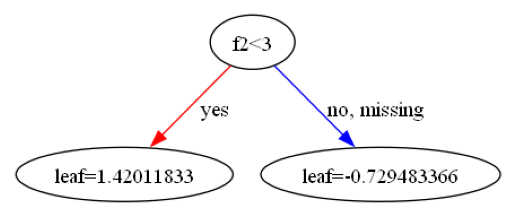

Precisión del modelo: 0.93
Matriz de confusión:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Informe de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [5]:

# Graficado del arbol 
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Metricas de evaluacion 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 

# lectura del Dataframe
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargamos el DF 
data = load_iris() 

# Separamos los datos en datos de entrenamiento (X_train) y datos de prueba (X_test)
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=.2)

# Se crea la instancia del modelo 
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

# Se ajusta el modelo 
bst.fit(X_train, y_train)

# Grafica del arbol 
plt.figure(figsize=(20, 10))
plot_tree(bst, num_trees=0, rankdir='TB')  # `rankdir='LR'` para un árbol de izquierda a derecha
plt.show()

# Se realizan las predicciones 
preds = bst.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, preds)
print(f"Precisión del modelo: {accuracy:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, preds)
print("Matriz de confusión:")
print(conf_matrix)

# Informe de clasificación
class_report = classification_report(y_test, preds, target_names=data['target_names'])
print("Informe de clasificación:")
print(class_report)


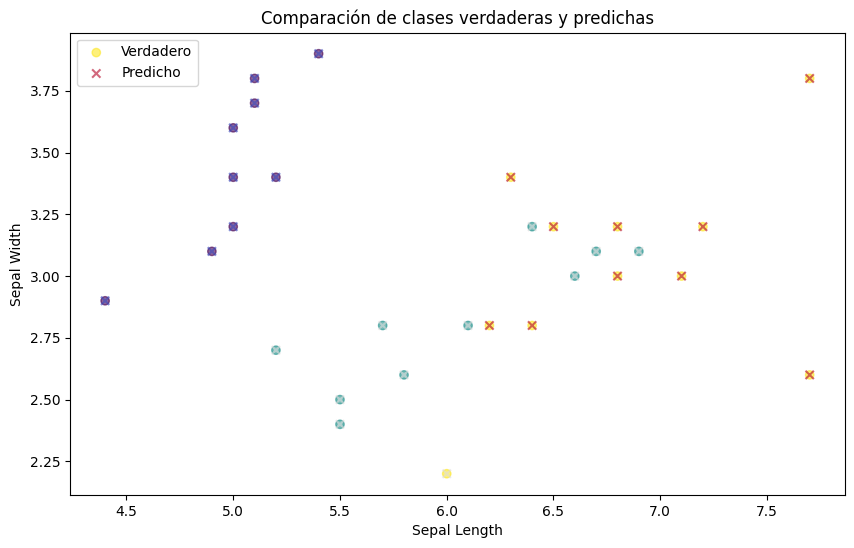

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
# Dispersión de datos verdaderos
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='Verdadero', alpha=0.6, cmap='viridis')
# Dispersión de datos predichos
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds, marker='x', label='Predicho', alpha=0.6, cmap='coolwarm')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Comparación de clases verdaderas y predichas')
plt.legend()
plt.show()


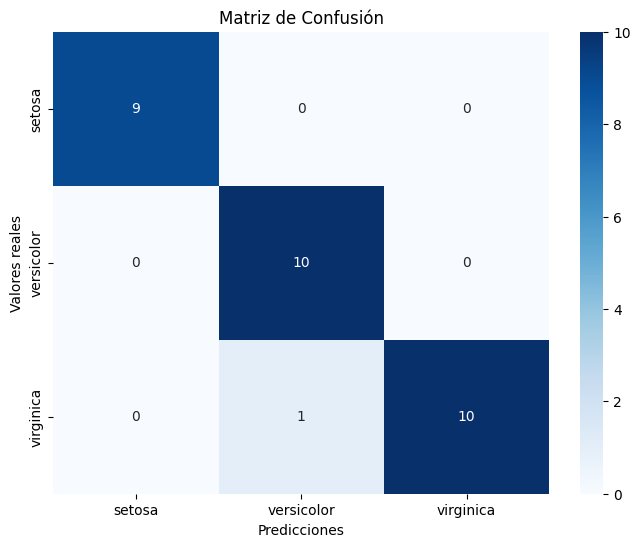

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, preds)

# Crear un gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['target_names'], yticklabels=data['target_names'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()


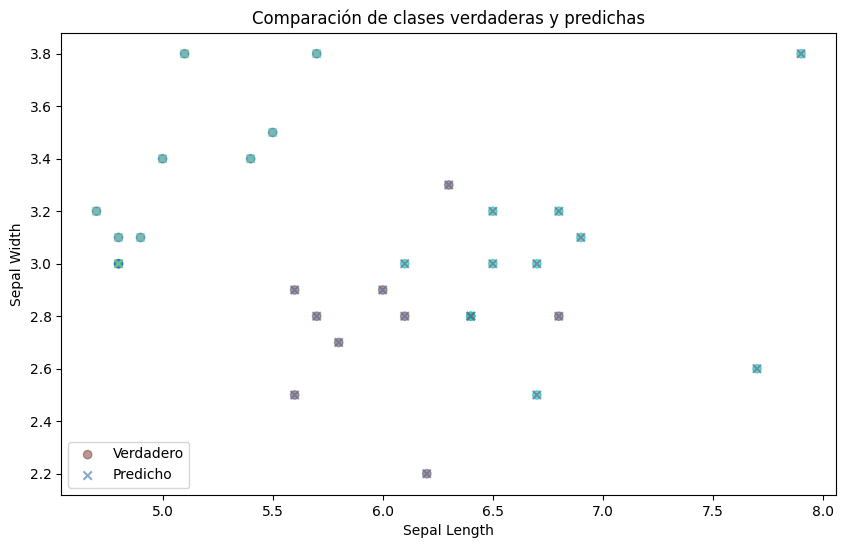

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Cargar el conjunto de datos Iris
data = load_iris()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state=42)

# Crear la instancia del modelo
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='multi:softmax', num_class=3)

# Ajustar el modelo
bst.fit(X_train, y_train)

# Realizar predicciones
preds = bst.predict(X_test)

# Crear un gráfico de dispersión con colores personalizados
plt.figure(figsize=(10, 6))

# Dispersión de datos verdaderos con un colormap diferente
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='Verdadero', alpha=0.6, cmap='tab10')

# Dispersión de datos predichos con un colormap diferente
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds, marker='x', label='Predicho', alpha=0.6, cmap='Accent')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Comparación de clases verdaderas y predichas')
plt.legend()
plt.show()
